

<h1><center>Decision Trees in Python</center></h1>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 15px">
    <ol>
        <li><a href="#intro">Introduction</a></li>
        <li><a href="#dataset">Dataset</a></li>
        <li><a href="#download_data">Download & Process the Data</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>
        <li><a href="#dtree">Decision Tree</a></li>
        <li><a href="#pred">Prediction & Evaluation</a></li>
    </ol>
</div>
<br>
<hr>

<div id="intro">
    <h2>Introducton</h2>
    Decision Tree is one of the most popular machine learning algorithm for supervised learning. This excercise gives a basic insight on how you will build a model from historical Wisconsin Diagnostic Breast Cancer (WDBC) dataset.
</div>


<div id="dataset">
    <h2>Dataset</h2>
    One very interesting application area of machine learning is in making medical diagnoses. The Wisconsin Diagnostic Breast Cancer (WDBC) dataset hosted by the famous UCI Machine Learning Repository is a real medical diagnoses of patients. 
    <br>
    <br>
    The dataset consists of 569 samples of biopsied tissue. The tissue for each sample is imaged and 10 characteristics of the nuclei of cells presenting each image are characterized. The 10 characteristics are:

  a) radius (mean of distances from center to points on the perimeter)<br>
  b) texture (standard deviation of gray-scale values) <br>
  c) perimeter <br>
d) area <br>
e) smoothness (local variation in radius lengths) <br>
f) compactness (perimeter^2 / area - 1.0) <br>
g) concavity (severity of concave portions of the contour) <br>
h) concave points (number of concave portions of the contour) <br>
i) symmetry <br>
j) fractal dimension ("coastline approximation" - 1)
    <br>
  
 The first two columns in the dataset are <i>ID</i> and the target variable <i>diagnosis</i> (A label of value M indicates the sample was for malignant (cancerous) tissue. A label of value B indicates the sample was for benign tissue). Then there are 30 feature vectors.; the first 10 entries in this feature vector are the mean of the characteristics (<a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">check the UCI Machine Learning page here for more about the descriptions</a>), the second 10 are the standard deviation and last 10 are the largest value of each of these characteristics present in each image. 
  
  
</div>

<div id="download_data"> 
    <h2>Download & Process the Data</h2>
    To download the data, we will use !wget to download it from the UCI Machine Learning Page.
</div>

In [1]:
!wget -O wdbc.data https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

--2019-08-15 13:15:21--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124103 (121K) [application/x-httpd-php]
Saving to: ‘wdbc.data’

wdbc.data           100%[===================>] 121.19K   645KB/s    in 0.2s    

2019-08-15 13:15:22 (645 KB/s) - ‘wdbc.data’ saved [124103/124103]



As you can see, the data set is a ***.data*** dataset. We can use the pandas library's *read_csv* to read the dataset.
Tune parameters accordingly.

Start by Importing these libraries 

In [0]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("wdbc.data", header=None)
df.columns = ['id', 'diagnosis', 
              'radius_mean', 'tex_mean', 'pmtr_mean', 'area_mean', 'smth_mean', 'comp_mean', 'cocv_mean', 'cocvpnts_mean', 'sym_mean', 'fracdim_mean',
              'radius_std', 'tex_std', 'pmtr_std', 'area_std', 'smth_std', 'comp_std', 'cocv_std', 'cocvpnts_std', 'sym_std', 'fracdim_std',
              'radius_max', 'tex_max', 'pmtr_max', 'area_max', 'smth_max', 'comp_max', 'cocv_max', 'cocvpnts_max', 'sym_max', 'fracdim_max']
df.head()
df.shape

(569, 32)

In [4]:
df['diagnosis'].value_counts()
#df.describe().astype(int)
#df.count

B    357
M    212
Name: diagnosis, dtype: int64

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>

Separate the feature matrix (Independent variable) and the response vector(dependent variable) into 2 separate dataframes. This is so we can easily preprocess each data: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (Independent Varables) </li>
    <li> <b> y </b> as the <b> response vector </b>  (dependent/target variable)</li>
</ul>

In [5]:
X = df.iloc[:, 2:]
print(X[0:5])

y = df.iloc[:, 1]
print(y[0:5])

   radius_mean  tex_mean  pmtr_mean  ...  cocvpnts_max  sym_max  fracdim_max
0        17.99     10.38     122.80  ...        0.2654   0.4601      0.11890
1        20.57     17.77     132.90  ...        0.1860   0.2750      0.08902
2        19.69     21.25     130.00  ...        0.2430   0.3613      0.08758
3        11.42     20.38      77.58  ...        0.2575   0.6638      0.17300
4        20.29     14.34     135.10  ...        0.1625   0.2364      0.07678

[5 rows x 30 columns]
0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object


<hr>

<div id="dtree">
    <h2>Decision Tree</h2>
    Import <b>train_test_split</b> from <b>sklearn.model_selection</b>. This will help us split the dataset into <i>Training set</i> and <i>Validation set</i><br>
  70% Training <br>
  30% Validation <br>
</div>

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape)
print(X_validation.shape,  y_validation.shape)

(398, 30) (398,)
(171, 30) (171,)


Start by innitializing the <b>DecisionTreeClassifier</b> using entropy selection criteria. Tune the parameters according to desired output.

In [0]:
modelTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
#modelTree

we will now fit the data with the training feature matrix <b> X_train </b> and training  response vector <b> y_train </b>

In [8]:
modelTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Visualize the tree**

In [9]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


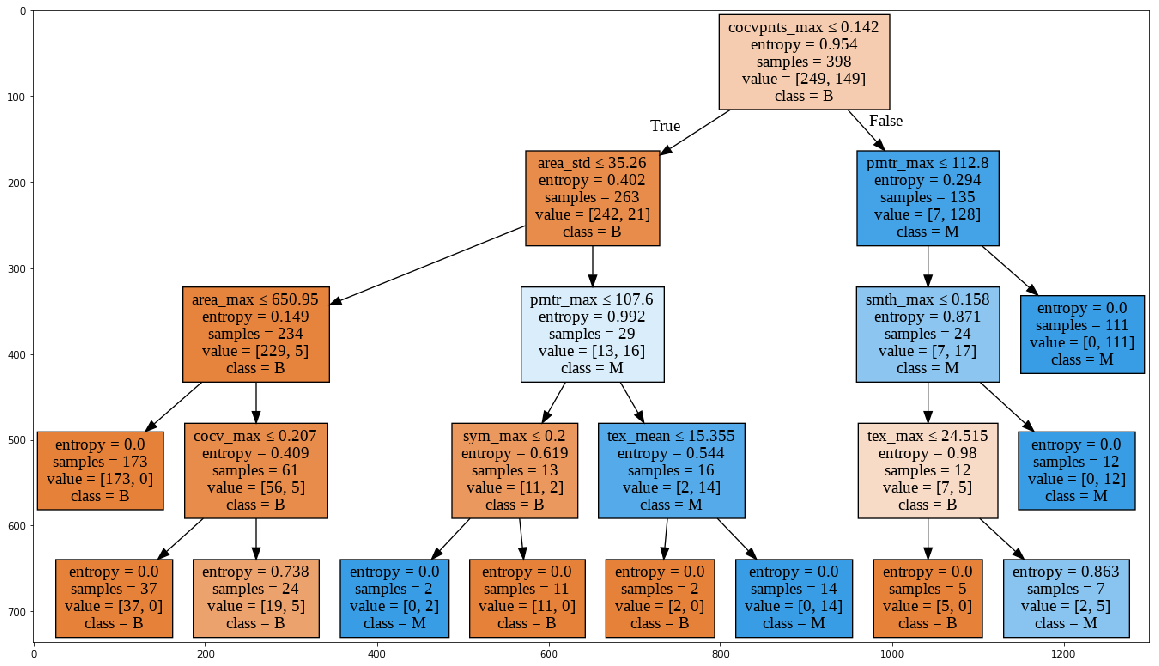

In [13]:
dot_data = StringIO()
filename = "wdbc.png"
featureNames = df.columns[2:]
targetNames = df["diagnosis"].unique().tolist()
out=tree.export_graphviz(modelTree,feature_names=featureNames, out_file=dot_data, 
                         class_names= np.unique(y_train), filled=True, 
                         special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(20, 40))
plt.imshow(img,interpolation='nearest')

Decision trees are easy to interpret: you can simply walk down the tree to see what combinations of variable brings about a particular outcome.

<hr>

<div id="pred">
    <h2>Prediction & Evaluation</h2>
    Let's make some <b>predictions</b> on the validation set and store it into a variable called <b>predTree</b>. and then check the <b> accuracy score </b>
</div>

In [11]:
predTree = modelTree.predict(X_validation)
print (y_validation [0:5])

512    M
457    B
439    B
298    B
37     B
Name: diagnosis, dtype: object


In [12]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_validation, predTree))

DecisionTrees's Accuracy:  0.9532163742690059


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

Here, we achieve an accuracy score of **96.5%** which is pretty high. 


<h2>Pros and Cons of Decision Tree</h2>

<h3> Pros </h3>
* Simplest method to find classification rules. <br>
* Produce rules that are easy to interpret & implement. <br>
* Do not require the assumptions of statistical models. <br>

<h3> Cons </h3>
* Very sensitive to training data <br>
* May not perform well where there is structure in the data that is not well captured by horizontal or vertical splits <br>

<h3>Thanks for reading!</h3>

<h4>Author:  <a href="https://www.linkedin.com/in/ademolabuwo">Ademola Arigbabuwo</a></h4>
